## ETAPA 1

In [1373]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataFrame = pd.read_csv('googleplaystore.csv') # Importando


## ETAPA 2

#### Remover linhas duplicadas

In [1374]:
# Remove as linhas duplicadas que possuem o mesmo número de reviews e o mesmo nome de aplicativo

dataFrame = dataFrame.drop_duplicates(subset=['App','Last Updated']) 


Verifiquei que existe uma linha que está com os dados para a esquerda

In [1375]:
print(dataFrame.loc[10472] , end="\n\n")
dataFrame.loc[10472] = dataFrame.loc[10472].shift(1) # Passa todos os dados pra esquerda
dataFrame.loc[10472, 'App'] = 'Life Made WI-Fi Touchscreen Photo Frame'
dataFrame.loc[10472, 'Category'] = 'TOOLS' # Valor que estava nulo, escolhi colocar na coluna TOOLS
dataFrame.loc[10472, 'Rating'] = float(dataFrame.loc[10472, 'Rating'])
dataFrame.loc[10472, 'Reviews'] = int(dataFrame.loc[10472, 'Reviews'])
print(dataFrame.loc[10472])

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                            TOOLS
Rating                                                1.9
Reviews                                     

C:\Users\gf-ca\AppData\Local\Temp\ipykernel_3616\2273508854.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataFrame.loc[10472] = dataFrame.loc[10472].shift(1) # Passa todos os dados pra esquerda


#### Gráfico de barras contendo os top 5 Apps por número de instalação

Esse pedido é complicado devido ao fato da coluna 'Installs' não ser numérica e sim se referir a intervalos, o que torna um 'rankeamento' incorreto, pois existem muitos Apps na mesma categoria e colocá-los como primeiro ou segundo não seria correto pois existem outros em igual posição.

<p> Primeiro vamos descobrir quais são os tipos de valores existentes

In [1376]:
dataFrame['Installs'].value_counts()

Installs
1,000,000+        1423
100,000+          1115
10,000+           1032
10,000,000+        948
1,000+             890
100+               710
5,000,000+         613
500,000+           505
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        207
50+                204
100,000,000+       195
5+                  82
1+                  67
500,000,000+        26
1,000,000,000+      22
0+                  14
0                    1
Name: count, dtype: int64

Verifica-se que os dados estão dados entre intervalos. O que acredito ser indicado seria categorizar os apps de acordo com esses intervalos

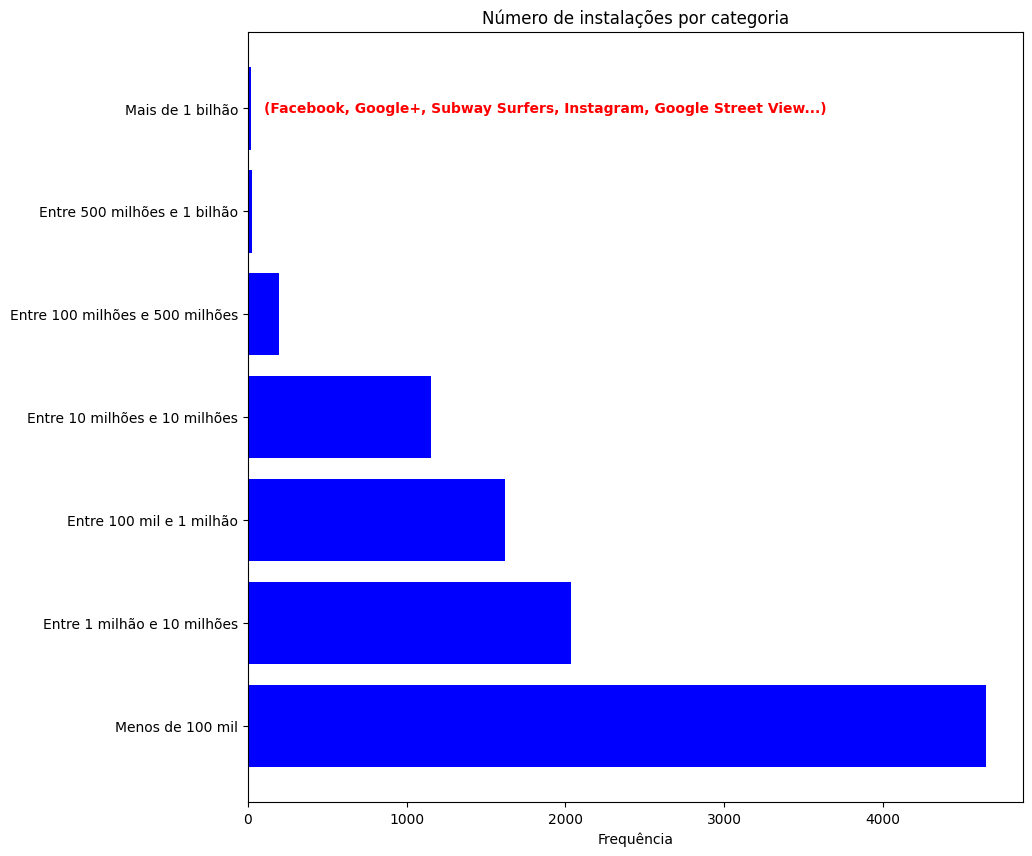

In [1377]:
plt.figure(figsize=(10,10))

dataFrame['Installs'] = ['0'  if i == 'Free' else i for i in dataFrame['Installs']] ## Tratando o FREE

dataFrame['Installs'] = [int(x.replace('+','').replace(',','')) for x in dataFrame['Installs']] ## Tratando o + e ,

def categorizando(i): # Função para categorizar
        if i < 100000:
            return 'Menos de 100 mil'
        elif i < 1000000:
            return 'Entre 100 mil e 1 milhão'
        elif i < 10000000:
            return 'Entre 1 milhão e 10 milhões'
        elif i < 100000000:
            return 'Entre 10 milhões e 10 milhões'
        elif i < 500000000:
            return 'Entre 100 milhões e 500 milhões'
        elif i < 1000000000:
            return 'Entre 500 milhões e 1 bilhão'
        else:
             return 'Mais de 1 bilhão'

dataFrame['Categoria Instalacoes'] = list(map(categorizando,dataFrame['Installs'])) # Criando uma nova coluna com as categorias

dataFrame.sort_values(by='Installs',ascending=False,inplace=True) # Ordenando os valores de acordo com as instalações

plt.barh(dataFrame['Categoria Instalacoes'].value_counts().index,  # Categorias no eixo X
        dataFrame['Categoria Instalacoes'].value_counts().values, # Contagem no eixo Y
        color='blue')

## Escreve na coluna com maior valor alguns dos aplicativos com mais de 1 bilhão de instalações
plt.text(100, 6, "({}, {}, {}, {}, {}...)".format(*(dataFrame['App'][0:5].values)), color="red",va='center', fontweight="bold",ha='left')
plt.title("Número de instalações por categoria")
plt.xlabel("Frequência")
plt.ylabel("")
plt.show()



#### Grafico de pizza com as categorias de Apps existentes com sua frequência

([<matplotlib.patches.Wedge at 0x219816b7a10>,
 [Text(0.9107403471410311, 0.6168889852229772, 'FAMILY'),
  Text(0.07508215986313103, 1.0974345854174121, 'GAME'),
  Text(-0.5396879072380852, 0.9585076748680607, 'TOOLS'),
  Text(-0.42259657057632055, -1.0155846289389836, 'Outros')])

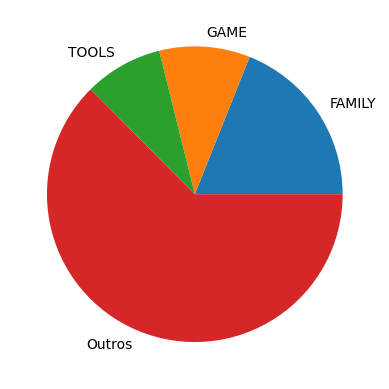

In [1378]:
# Faz basicamente uma contagem de quantas vezes os valores de categoria aparecem nas linhas
todosOsValores= dataFrame['Category'].value_counts() 

# Criando uma série com a soma dos valores que são maiores ou iguais a 800
outros = pd.Series({'Outros': todosOsValores[todosOsValores < 800].sum()})

# Concatenando os valores maiores ou iguais a 800 com a série de outros
resultado = pd.concat([todosOsValores[todosOsValores >= 800],outros])

# Plotando o gráfico de pizza
plt.pie(resultado,labels=resultado.index)


#### APP MAIS CARO EXISTENTE

In [1379]:
# Função para controlar o erro que dara ao fazer o casting com valores que não são números
def transformar(x):
    try:
        return float(x)
    except:
        return 0
    
# Transformando os valores da coluna Price para float
dataFrame['Price'] = [transformar(x.replace('$','')) for x in dataFrame['Price']]

# Ordenando os valores de acordo com o preço
dataFrame.sort_values(by='Price',ascending=False,inplace=True)

# Printando o aplicativo mais caro
print("O aplicativo mais caro é o " + dataFrame[['App','Price']].iloc[0]['App'] + " e custa $" + str(dataFrame[['App','Price']].iloc[0]['Price']))

O aplicativo mais caro é o I'm Rich - Trump Edition e custa $400.0


#### Quantos Apps são classificados com Mature 17

In [1380]:
# Pegando o número
numero = int(dataFrame['Content Rating'].value_counts()['Mature 17+'])

# Printando o número
print("O número de aplicativos com classificação Mature 17+ é " + str(numero))

O número de aplicativos com classificação Mature 17+ é 395


#### Top 10 Apps em número de Reviews

In [1381]:
dataFrame['Reviews'] = [int(x) for x in dataFrame['Reviews']] # Fazendo o casting para int

dataFrame.sort_values(by='Reviews',ascending=False,inplace=True) # Ordenando os valores de acordo com as reviews

dataFrame[['App','Reviews']].head(10) # Printando os 5 aplicativos com mais reviews

,App,Reviews
2544,Facebook,78158306
336,WhatsApp Messenger,69119316
2545,Instagram,66577313
335,Messenger – Text and Video Chat for Free,56642847
1670,Clash of Clans,44891723
4005,Clean Master- Space Cleaner & Antivirus,42916526
1654,Subway Surfers,27722264
3665,YouTube,25655305
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999
1660,Clash Royale,23133508


#### Top 5 Categorias com maior tamanho de aplicativo

<BarContainer object of 5 artists>

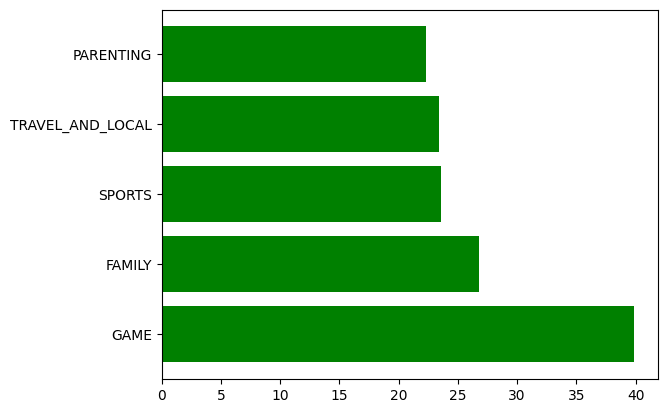

In [1382]:
# Função para nomear cada linha da nova coluna
def transformar(x):
    if('M' in x):
        return float(x.replace('M',''))
    elif('k' in x):
        return float(x.replace('k',''))/1000
    if(x == 'Varies with device'):
        return 0.0

# Aplicando a função a coluna Size
dataFrame['Size'] = dataFrame['Size'].apply(transformar)
dataFrame.sort_values(ascending=False, by='Size',inplace=True)

# Calculando a média dos valores diferentes de 0
media = dataFrame['Size'][dataFrame['Size'] != 0].mean()

# Substituindo os valores 0 pela média
dataFrame['Size'] = [media if x == 0 else x for x in dataFrame['Size']]

# Agrupando os valores pela categoria e calculando a média
dados = dataFrame.groupby('Category')['Size'].mean().sort_values(ascending=False)[0:5]

plt.barh(dados.index,dados.values,color='green')

#### O aplicativo com mais de 1 bilhão de instalações mais bem avaliado

In [1383]:
dataFrame[dataFrame['Installs'] == 1000000000].sort_values(by='Rating',ascending=False)[['App','Rating']][0:5]

,App,Rating
1654,Subway Surfers,4.5
2808,Google Photos,4.5
5395,Google Photos,4.5
2545,Instagram,4.5
4170,Google Drive,4.4


4 Apps tem o mesmo valor de rating maior, portanto, para desempatar usaremos a quantidade de pessoas que avaliaram o aplicativo, aumentando o tamanho da amosta e a precisão do resultado. Para isso, irei criar um indicativo para medir a qualidade do produto. Farei uma média ponderada com rating com peso 7 e número de reviews dividido por 100 milhões com peso 3.

In [1384]:
dataFrame["Qualidade"] = dataFrame.apply(lambda x:((x['Rating']*7+x['Reviews']*3)/100000000),axis=1)

dados = dataFrame[dataFrame["Installs"] == 1000000000]["Qualidade"]

dataFrame[dataFrame['Installs'] == 1000000000].sort_values(by=['Qualidade'],ascending=False)[['App','Qualidade','Rating','Reviews']].head(1)

,App,Qualidade,Rating,Reviews
2544,Facebook,2.344749,4.1,78158306


Escolhi fazer um gráfico que mostra a distância entre o primerio lugar com relação aos outros com mais de 1B com índice qualidade

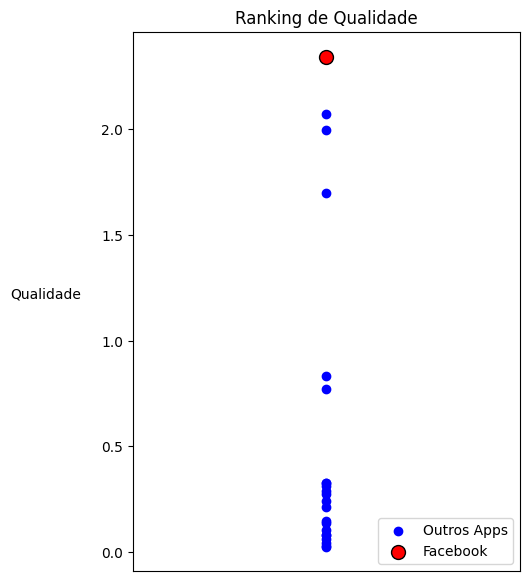

In [1385]:
plt.figure(figsize=(5, 7))

plt.scatter([1 for x in range(len(dados))], dados.values, color='blue',marker='o', label='Outros Apps')

plt.scatter(1, 2.344749, color='red', s=100, edgecolors='black', label='Facebook') 
plt.xticks([])
plt.xlabel('')
plt.ylabel('Qualidade',rotation=0, labelpad=40)
plt.title('Ranking de Qualidade')
plt.legend(loc='lower right')# Exibir o gráfico
plt.show()